In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### *Let us understand Maths by implementing, In your data science journey you cannot get the complete interpretation of the algorithms without knowing the underlying math.*

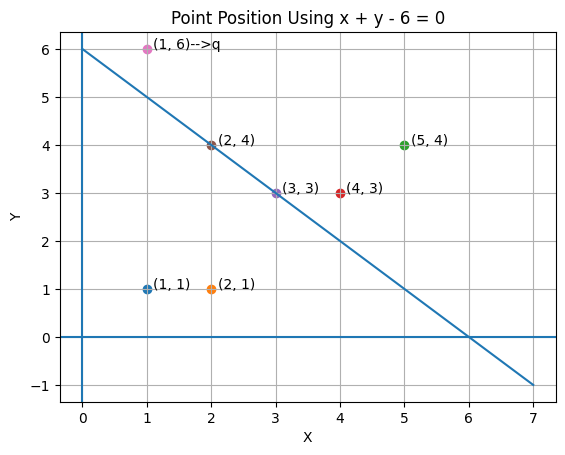

In [3]:
# Line: x + y = 6  →  y = 6 - x
x = np.linspace(0, 7, 100)
y = 6 - x

# Points
left_points = [(1,1), (2,1)]
right_points = [(5,4), (4,3)]
on_line =[(3,3),(2,4)]
q=(1,6)

plt.plot(x, y)

for p in left_points:
    plt.scatter(p[0], p[1])
    plt.text(p[0]+0.1, p[1], f"{p[0],p[1]}")

for p in right_points:
    plt.scatter(p[0], p[1])
    plt.text(p[0]+0.1, p[1], f"{p[0],p[1]}")

for p in on_line:
    plt.scatter(p[0], p[1])
    plt.text(p[0]+0.1, p[1], f"{p[0],p[1]}")

plt.scatter(q[0],q[1])
plt.text(q[0]+0.1, q[1], f"{q[0],q[1]}-->q")

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.title("Point Position Using x + y - 6 = 0")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


1. In the above graph we can see some points to the right of the line, left of the line and also on the line.
2. we can also see a point q.
3. let us try to do some math on these points.



#### Task–1:

1. Calculate the **Euclidean distance** between the query point \(q\) and **all the points on the left side** of the line.

2. Calculate the **Euclidean distance** between the query point \(q\) and **all the points on the right side** of the line.

3. Similarly, calculate the **Euclidean distance** between the query point \(q\) and **a point lying on the line**.

4. Based on your calculations, answer the following:
   - Which point is **nearest to the query point \(q\)?**

---


In [24]:
# code here
from sklearn.metrics import euclidean_distances
q =np.array([(1,6)])
left_points = np.array([(1,1), (2,1)])
left_points_dist = euclidean_distances(q,left_points)
left_points_dist.shape
right_points = np.array([(5,4), (4,3)])
right_points_dist = euclidean_distances(q,right_points)
right_points_dist
on_line_points = np.array([(3,3),(2,4)])
on_line_points_dist = euclidean_distances(q,on_line)
print('Left points distances from query point',left_points_dist,'\n Right points distances from quey point',right_points_dist,
     '\n on line points distances from query point',on_line_points_dist)

Left points distances from query point [[5.         5.09901951]] 
 Right points distances from quey point [[4.47213595 4.24264069]] 
 on line points distances from query point [[3.60555128 2.23606798]]


#### Task -2


In [35]:
line_exp = lambda x, y: 1*x + 1*y - 6 # the equation is x+y-6=0
line_exp(1,1) # substitute the x and y values

-4

1. What do you notice about the sign of the values for:

*   Left-side points?
*   Right-side points?
*   The point on the line?

2. Where does the query point q lie based on its output?

3. What general rule can you infer about the expression 1*x + 1*y - 6?

4. If i give another point w that is not present can you identify on which side of the plane will the point reside?



#code here  
1.What do you notice about the sign of the values for:
  - Negative for Left-side points
  - Positive for Right-side points
  - Neutral for on the line points
2. Where does the query point q lie based on its output?
  - output is positive than it is above the line_exp
3. What general rule can you infer about the expression 1x + 1y - 6?
  - Sign of the expression tells which side of the line a point is on
4. If i give another point w that is not present can you identify on which side of the plane will the point reside?
  - by substituting the values into the equation,based on the sign of output we can identify on which side of plane does the point reside

### Task3: Classify Points Using the Dot Product with Normal

We have the line:

\[
x + y - 6 = 0
\]

1. The vector perpendicular to the line is called the **normal**, and it is:
\[
n = (1, 1)
\]

2. You are given the following points:

- Left-side candidates: P1 = (1,1), P2 = (2,1)  
- Right-side candidates: P3 = (5,4), P4 = (4,3)  
- On the line: P5 = (3,3), P6 = (2,4)  
- Query point: q = (2,4)

---

#### Instructions:

1. For each point \(p = (x, y)\), compute the expression:
\(
n \.p - 6
\)

2. Based on the **sign of `value`**, classify the point as:

- **Right of the line** (value > 0)  
- **Left of the line** (value < 0)  
- **On the line** (value = 0)

3. Document your results in a dataframe showing:

| Point | Value | Classification |
|-------|-------|----------------|

4. Do the same for the query point `q`.


In [85]:
n= np.array([1,1]) # this is the normal vector of the equation x+y-6=0
p=np.array([2,4])
np.dot(n,p)-6 #----> here the point is (2,4) when computed dot product with (1,1) i.e. normal and subtract 6, the result is 0.
# this point lies on the line.

0

In [86]:
# code here
l = [(1,1),(2,1),(5,4),(4,3),(3,3),(2,4),(2,4)]
res = []
for i in l:
    n = np.array([1,1])
    p = np.array(i)
    res.append(np.dot(n,p)-6)
res

[-4, -3, 3, 1, 0, 0, 0]

In [87]:
classification = ['Above' if x > 0 else ('Below' if x < 0 else 'Zero') for x in res]
classification

['Below', 'Below', 'Above', 'Above', 'Zero', 'Zero', 'Zero']

In [88]:
df = pd.DataFrame({
    'Point': l,
    'value': res,
    'classification': classification
})

In [75]:
df

,Point,value,classification
0,"(1, 1)",-4,Below
1,"(2, 1)",-3,Below
2,"(5, 4)",3,Above
3,"(4, 3)",1,Above
4,"(3, 3)",0,Zero
5,"(2, 4)",0,Zero
6,"(2, 4)",0,Zero


### Task 4: Classify Points and Compute Distances for Planes.

#### 1: Calculate the euclidean distance between these 2 points {p1=(10,1,2), p2=(11,10,2)}

#### 2: 3D Plane
- Plane: x + y + z - 6 = 0
- Points: A(1,1,1), B(2,2,2), C(3,2,2), q(2,1,3)
- Compute:
  1. Dot product: n · p - d
  2. Side of the plane (Above/Below/On)
- Document results in a table:

| Point | Value | Classification |
|-------|-------|----------------|

In [65]:
euclidean_distances([(10,1,2)],[(11,10,2)])

array([[9.05538514]])

In [116]:
line_exp = lambda x, y, z: 1*x + 1*y + 1*z - 6 # the equation is x+y-6=0
line_exp(1,1,1) # substitute the x and y values

-3

In [117]:
p = [(1,1,1),(2,2,2),(3,2,2),(2,1,3)]
res = []
for i in p:
    n= np.array([1,1,1]) 
    p=np.array(i)
    res.append(np.dot(n,p)-6 )
res

[-3, 0, 1, 0]

In [118]:
classification = ['Above' if x > 0 else ('Below' if x < 0 else 'Zero') for x in res]
classification

['Below', 'Zero', 'Above', 'Zero']

In [119]:
len([(1,1,1),(2,2,2),(3,2,2),(2,1,3)]),len(res),len(classification)

(4, 4, 4)

In [120]:
df = pd.DataFrame({
    'Point':[(1,1,1),(2,2,2),(3,2,2),(2,1,3)],
    'Value':res,
    'Classification':classification
})

In [121]:
df

,Point,Value,Classification
0,"(1, 1, 1)",-3,Below
1,"(2, 2, 2)",0,Zero
2,"(3, 2, 2)",1,Above
3,"(2, 1, 3)",0,Zero


### Task 5: Classify Points and Compute Distances for Hyperplanes

#### 1: Calculate the euclidean distance between these 2 points {p1=(10,1,2,3), p2=(11,10,2,5)}

#### 2: 4D Hyperplane
- Hyperplane: 2x1 + x2 - x3 + x4 - 5 = 0
- Points: P1(1,1,0,2), P2(2,0,1,1), P3(1,2,1,1), q(1,1,1,1)
- Compute:
  1. Dot product: n · p + b , where n is the normal vector and p is the data point b is the intercept.
  2. Euclidean distance from hyperplane
  3. Side (Positive/Negative/On)
- Document results in a table:

| Point | Value | Classification |
|-------|-------|----------------|


In [122]:
p1=np.array([(10,1,2,3)])
p2=np.array([(11,10,2,5)])
euclidean_distances(p1,p2)

array([[9.2736185]])

In [123]:
lin_exp4D = lambda x1,x2,x3,x4 : 2*x1 + 1*x2 - 1*x3 + 1*x4 - 5
lin_exp4D(1,1,1,1)

-2

In [124]:
p = [(1,1,0,2), (2,0,1,1), (1,2,1,1), (1,1,1,1)]
res = []
for i in p:
    n= np.array([1,1,1,1]) 
    p=np.array(i)
    res.append(np.dot(n,p)-5)
res

[-1, -1, 0, -1]

In [126]:
classification = ['Positive' if x > 0 else ('Negative' if x < 0 else 'On') for x in res]
classification

['Negative', 'Negative', 'On', 'Negative']

In [127]:
df = pd.DataFrame({
    'Point':[(1,1,1),(2,2,2),(3,2,2),(2,1,3)],
    'Value':res,
    'Classification':classification
})

In [128]:
df

,Point,Value,Classification
0,"(1, 1, 1)",-1,Negative
1,"(2, 2, 2)",-1,Negative
2,"(3, 2, 2)",0,On
3,"(2, 1, 3)",-1,Negative
